<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_2%EC%9E%A5_%ED%9A%8C%EA%B7%80%EB%AA%A8%ED%98%95(%2B%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀모형(보스턴하우징데이터)
선형 회귀모형에 더 나은 적합을 위해 연속형 목표변수인 medv가 최대값인 50인 관측치 16개를 찾아 제외하고, 수치형으로 입력된 chas, rad 변수를 범주형으로 변환함(함수:factor)

##모형적합 :보스턴하우징 데이터(모든변수사용)
>MASS패키지의 보스턴하우징데이터 사용

In [4]:
#데이터 가져오기
library(MASS)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [10]:
#데이터 가공
i = which(Boston$medv == 50)
boston = Boston[-i, ]
boston$chas = factor(boston$chas)
boston$rad = factor(boston$rad)
attach(boston)

In [17]:
#회귀모형 적합(모든 변수 사용)
fit.all = lm(medv ~ ., data = boston)

In [18]:
#선형회귀모형 적합 결과
summary(fit.all)


Call:
lm(formula = medv ~ ., data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5220 -2.2592 -0.4275  1.6778 15.2894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.120918   4.338656   6.942 1.29e-11 ***
crim         -0.105648   0.025640  -4.120 4.47e-05 ***
zn            0.044104   0.011352   3.885 0.000117 ***
indus        -0.046743   0.051044  -0.916 0.360274    
chas1         0.158802   0.736742   0.216 0.829435    
nox         -11.576589   3.084187  -3.754 0.000196 ***
rm            3.543733   0.356605   9.937  < 2e-16 ***
age          -0.026082   0.010531  -2.477 0.013613 *  
dis          -1.282095   0.160452  -7.991 1.05e-14 ***
rad2          2.548109   1.175012   2.169 0.030616 *  
rad3          4.605849   1.064492   4.327 1.85e-05 ***
rad4          2.663393   0.950747   2.801 0.005299 ** 
rad5          3.077800   0.962725   3.197 0.001483 ** 
rad6          1.314892   1.157689   1.136 0.256624    
rad7          4.86420

## 변수선택 : 단계적 선택법
함수 step(direction = "both")
어떤 변수가 제외/추가됬는지 변수선택과정보기 : 변수명$anova

In [ ]:
#단계적선택법
fit.step.both = step(fit.all, direction = "both")
fit.step.both$anova

>해석
2단계 : chas제외
3단계 : indus제외
Deviance => 이전단계모형과 Resid.Dev의 차이
즉, chas, indus를 제외한 모형이 가장 좋은 선택임임

In [ ]:
#단계적선택법에 의해 생성된 모형 적합 결과
summary(fit.step.both)

> 설명
1. 입력변수 crim의 회귀계수 추정치는 음수이므로 crim이 증가함에 따라 목표변수 medv는 감소함.
2. rad 변수는 9개의 범주로 구성되어 있기 때문에 8개의 가변수가 생성됨
3. 각 입력변수의 t값의 절대값은 커서 대응하는 p값은 0.05보다 작아서 유의하다고 할 수 잇음
(이때 rad의 가변수 중 하나는 유의하지 않지만, rad의 다른 가변수가 유의하므로 제거되지 않고 여전히 모형에 포함됨)
4. R2는 79.07(수정된R2=7827)로 적합한 선형회귀모형으로 데이터를 설명할 수 있는 부분이 약80%로 높다고 할 수 잇음
5. 또한 F검정의 P값(2.2e-16)이 아주 작은 것도 모형이 적합하다는 것을 지지함

##변수선택 : 후진소거법

In [27]:
#후진소거법
fit.step.back = step(fit.all, direction = "backward")
fit.step.back$anova

Start:  AIC=1295.03
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq    RSS    AIC
- chas     1      0.63 6321.5 1293.1
- indus    1     11.30 6332.2 1293.9
<none>                 6320.9 1295.0
- age      1     82.67 6403.5 1299.4
- tax      1    126.28 6447.1 1302.7
- nox      1    189.88 6510.7 1307.5
- black    1    192.42 6513.3 1307.7
- zn       1    203.44 6524.3 1308.5
- crim     1    228.82 6549.7 1310.5
- rad      8    721.85 7042.7 1332.0
- ptratio  1    706.41 7027.3 1344.9
- dis      1    860.51 7181.4 1355.6
- lstat    1    965.26 7286.1 1362.7
- rm       1   1330.92 7651.8 1386.7

Step:  AIC=1293.08
medv ~ crim + zn + indus + nox + rm + age + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq    RSS    AIC
- indus    1     11.00 6332.5 1291.9
<none>                 6321.5 1293.1
- age      1     82.48 6404.0 1297.4
- tax      1    130.45 6451.9 1301.1
- nox      1    189.27 6510.8

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,469,6320.865,1295.031
- chas,1,0.6261633,470,6321.491,1293.079
- indus,1,10.9964825,471,6332.487,1291.931


In [28]:
#후진소거법에 의해 생성된 모형 적합 결과
summary(fit.step.back)


Call:
lm(formula = medv ~ crim + zn + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5200 -2.2850 -0.4688  1.7535 15.3972 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.252522   4.329907   6.987 9.64e-12 ***
crim         -0.104568   0.025533  -4.095 4.96e-05 ***
zn            0.045510   0.011235   4.051 5.97e-05 ***
nox         -12.366882   2.932651  -4.217 2.97e-05 ***
rm            3.583130   0.353644  10.132  < 2e-16 ***
age          -0.025822   0.010514  -2.456 0.014412 *  
dis          -1.253903   0.157029  -7.985 1.08e-14 ***
rad2          2.387130   1.160735   2.057 0.040278 *  
rad3          4.644091   1.062157   4.372 1.51e-05 ***
rad4          2.608777   0.944668   2.762 0.005977 ** 
rad5          3.116933   0.960550   3.245 0.001258 ** 
rad6          1.422890   1.150280   1.237 0.216705    
rad7          4.868388   1.240114   3.926 9.94e-05 ***
ra

##변수선택 : 전진선택법

In [29]:
#전진선택법
fit.step.forward = step(fit.all, direction = "forward")
fit.step.forward$anova

Start:  AIC=1295.03
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat



Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,469,6320.865,1295.031


In [30]:
#전진선택법에 의해 생성된 모형 적합 결과
summary(fit.step.forward)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + black + lstat, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5220 -2.2592 -0.4275  1.6778 15.2894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.120918   4.338656   6.942 1.29e-11 ***
crim         -0.105648   0.025640  -4.120 4.47e-05 ***
zn            0.044104   0.011352   3.885 0.000117 ***
indus        -0.046743   0.051044  -0.916 0.360274    
chas1         0.158802   0.736742   0.216 0.829435    
nox         -11.576589   3.084187  -3.754 0.000196 ***
rm            3.543733   0.356605   9.937  < 2e-16 ***
age          -0.026082   0.010531  -2.477 0.013613 *  
dis          -1.282095   0.160452  -7.991 1.05e-14 ***
rad2          2.548109   1.175012   2.169 0.030616 *  
rad3          4.605849   1.064492   4.327 1.85e-05 ***
rad4          2.663393   0.950747   2.801 0.005299 ** 
rad5          3.077800   0.962725   3.197 

##예측치 계산,관측치의 산점도(단계적선택법)
>
최종모형으로 목표변수의 예측치를 계산하여, 예측치와 관측치의 산점도를 그림

In [23]:
#단계적선택법으로 생성됨 모형 사용
#예측치(predictions)
yhat = predict(fit.step.both, newdata = boston, type = "response")
head(yhat)

1        2        3        4        5        6 
26.59831 24.00195 28.99396 29.60018 29.07676 26.41636

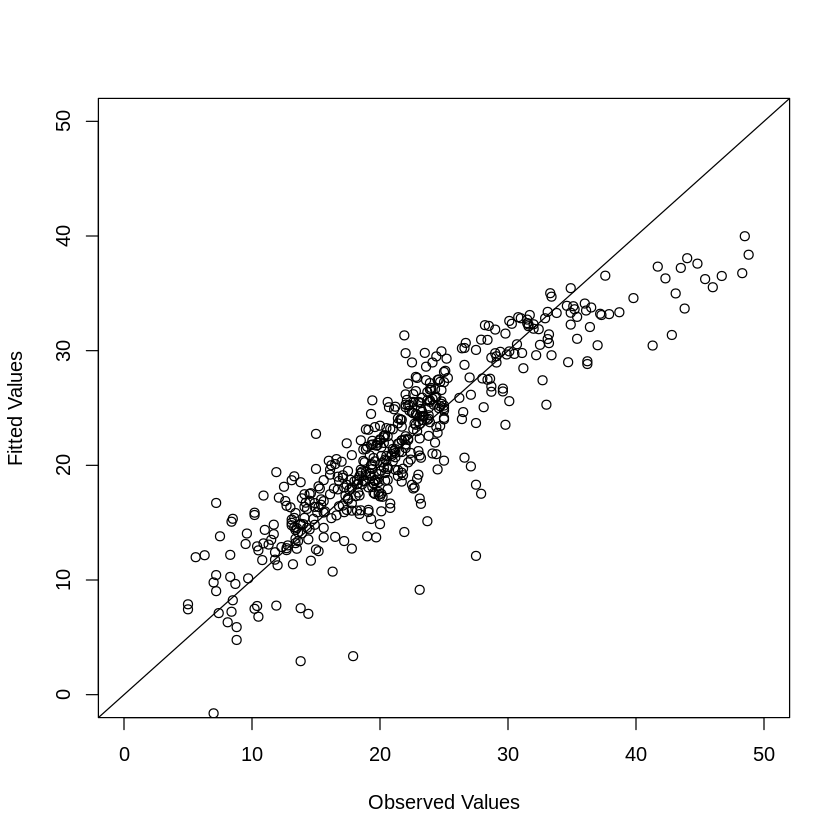

In [25]:
#예측치와 관측치의 산점도
plot(boston$medv, fit.step.both$fitted, xlim = c(0, 50), ylim = c(0, 50), xlab = "Observed Values", ylab = "Fitted Values")
abline(a=0, b=1) #45도 직선

In [26]:
#MSE 생성
mean((boston$medv-yhat)^2)

[1] 12.92344

#로지스틱 회귀모형(독일신용평가데이터)

##모형 적합 :독일신용평가데이터(모든변수사용)
수치로 표시된 numcredits, residence, residpeaple을 범주형 변수로 변환하고, 이항형변수 y는 두개의 반응값 good과 bad를 가지는데 이를 1과 0으로 변환

In [34]:
#데이터 가져오기
url_german = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt"
german = read.table(url_german, head=T)
attach(german)
head(german)

The following object is masked from boston:

    age


The following object is masked from package:MASS:

    housing




,check,duration,history,purpose,credit,savings,employment,installment,personal,debtors,⋯,property,age,others,housing,numcredits,job,residpeople,telephone,foreign,y
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,good
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,bad
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,good
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,good
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,bad
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,good


In [35]:
#데이터 가공
german$numcredits = factor(german$numcredits)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)
german$y = ifelse(german$y == "good", 1, 0)

In [46]:
#로지스틱회귀모형 학습(모든 변수 사용)
gfit.all = glm(y ~ ., family = binomial, data = german)

In [ ]:
summary(gfit.all)

## 변수선택 : 단계적 선택법
함수 step(direction = "both")
어떤 변수가 제외/추가됬는지 변수선택과정보기 : 변수명$anova

In [48]:
#단계적선택법
gfit.step.both = step(gfit.all, direction = "both")
gfit.step.both$anova

Start:  AIC=993.44
y ~ check + duration + history + purpose + credit + savings + 
    employment + installment + personal + debtors + residence + 
    property + age + others + housing + numcredits + job + residpeople + 
    telephone + foreign

              Df Deviance     AIC
- job          3   888.00  988.00
- numcredits   3   890.25  990.25
- property     3   890.70  990.70
- residpeople  1   888.52  992.52
- age          1   889.37  993.37
- telephone    1   889.40  993.40
<none>             887.44  993.44
- employment   4   895.48  993.48
- housing      2   891.63  993.63
- residence    3   894.74  994.74
- debtors      2   894.80  996.80
- others       2   895.71  997.71
- personal     3   897.80  997.80
- foreign      1   894.16  998.16
- credit       1   895.07  999.07
- duration     1   896.25 1000.25
- installment  1   900.81 1004.81
- savings      4   908.55 1006.55
- history      4   911.01 1009.01
- purpose      9   922.07 1010.07
- check        3   957.33 1057.33

Step:

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,947,887.4372,993.4372
- job,3,0.5588674,950,887.9960,987.9960
- numcredits,3,2.8582392,953,890.8543,984.8543
- property,3,3.1777611,956,894.0320,982.0320
- residpeople,1,1.0747973,957,895.1068,981.1068
- employment,4,7.9298736,961,903.0367,981.0367
- age,1,1.8704615,962,904.9072,980.9072


>해석
2단계 : job제외
3단계 : numcredits제외
4단계 : property제외
5단계 : residpeople
6단계 : age
7단계 : employment

In [49]:
#단계적선택법에 의해 생성된 모형 적합 결과
summary(gfit.step.both)


Call:
glm(formula = y ~ check + duration + history + purpose + credit + 
    savings + installment + personal + debtors + residence + 
    others + housing + telephone + foreign, family = binomial, 
    data = german)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7904  -0.7290   0.3885   0.6911   2.1780  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -9.736e-01  7.032e-01  -1.385 0.166204    
checkA12       3.863e-01  2.136e-01   1.809 0.070468 .  
checkA13       1.055e+00  3.636e-01   2.902 0.003714 ** 
checkA14       1.782e+00  2.308e-01   7.721 1.15e-14 ***
duration      -2.726e-02  9.034e-03  -3.018 0.002546 ** 
historyA31     1.290e-01  5.297e-01   0.244 0.807596    
historyA32     8.608e-01  4.104e-01   2.097 0.035956 *  
historyA33     9.975e-01  4.675e-01   2.133 0.032889 *  
historyA34     1.564e+00  4.329e-01   3.612 0.000303 ***
purposeA41     1.591e+00  3.684e-01   4.320 1.56e-05 ***
purposeA410    1.397e+00 

>해석
1. 입력변수check(당좌예금계좌)는 4개의 범주(계좌없음/잔액없음/잔액200이하/잔액200이상)이므로 3개의 가변수가 생성됨
2. 추정된 회귀계수는 모두 양수임
3. 기준범주(계좌없음)에 비해 다른 범주에 속할 때 신용이 좋을 확률(Y=1)이 더 높다고 할 수 있음
4. 또한 다른 입력변수가 일정할 때, check의 기준범주에 비해 3개 범주는 각각 exp(0.3863) = 1.472, exp(1.055)=2.872, exp(1.782)=5.942배 오즈가 증가함
5. 연속형 입력변수 duration(대출기간)은 음의 회귀계수를 가지므로 대출기간이 증가할 수록 신용이 낮아짐
6. 대출기간이 한달 증가할 때마다 오즈가 exp(0.0726)=1.075배 줄어듬
7. Null deviance는 상수항만 가진 모형의 이탈도
8. Residual deviance는 최종모형의 이탈도를 의미함
9. 최종모형의 AIC는 980.91임

##변수선택 : 후진소거법

In [50]:
#후진소거법
gfit.step.back = step(gfit.all, direction = "backward")
gfit.step.back$anova

Start:  AIC=993.44
y ~ check + duration + history + purpose + credit + savings + 
    employment + installment + personal + debtors + residence + 
    property + age + others + housing + numcredits + job + residpeople + 
    telephone + foreign

              Df Deviance     AIC
- job          3   888.00  988.00
- numcredits   3   890.25  990.25
- property     3   890.70  990.70
- residpeople  1   888.52  992.52
- age          1   889.37  993.37
- telephone    1   889.40  993.40
<none>             887.44  993.44
- employment   4   895.48  993.48
- housing      2   891.63  993.63
- residence    3   894.74  994.74
- debtors      2   894.80  996.80
- others       2   895.71  997.71
- personal     3   897.80  997.80
- foreign      1   894.16  998.16
- credit       1   895.07  999.07
- duration     1   896.25 1000.25
- installment  1   900.81 1004.81
- savings      4   908.55 1006.55
- history      4   911.01 1009.01
- purpose      9   922.07 1010.07
- check        3   957.33 1057.33

Step:

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,947,887.4372,993.4372
- job,3,0.5588674,950,887.9960,987.9960
- numcredits,3,2.8582392,953,890.8543,984.8543
- property,3,3.1777611,956,894.0320,982.0320
- residpeople,1,1.0747973,957,895.1068,981.1068
- employment,4,7.9298736,961,903.0367,981.0367
- age,1,1.8704615,962,904.9072,980.9072


In [51]:
#후진소거법에 의해 생성된 모형 적합 결과
summary(gfit.step.back)


Call:
glm(formula = y ~ check + duration + history + purpose + credit + 
    savings + installment + personal + debtors + residence + 
    others + housing + telephone + foreign, family = binomial, 
    data = german)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7904  -0.7290   0.3885   0.6911   2.1780  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -9.736e-01  7.032e-01  -1.385 0.166204    
checkA12       3.863e-01  2.136e-01   1.809 0.070468 .  
checkA13       1.055e+00  3.636e-01   2.902 0.003714 ** 
checkA14       1.782e+00  2.308e-01   7.721 1.15e-14 ***
duration      -2.726e-02  9.034e-03  -3.018 0.002546 ** 
historyA31     1.290e-01  5.297e-01   0.244 0.807596    
historyA32     8.608e-01  4.104e-01   2.097 0.035956 *  
historyA33     9.975e-01  4.675e-01   2.133 0.032889 *  
historyA34     1.564e+00  4.329e-01   3.612 0.000303 ***
purposeA41     1.591e+00  3.684e-01   4.320 1.56e-05 ***
purposeA410    1.397e+00 

##변수선택 : 전진선택법

In [52]:
#전진선택법
gfit.step.forward = step(gfit.all, direction = "forward")
gfit.step.forward$anova

Start:  AIC=993.44
y ~ check + duration + history + purpose + credit + savings + 
    employment + installment + personal + debtors + residence + 
    property + age + others + housing + numcredits + job + residpeople + 
    telephone + foreign



Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,947,887.4372,993.4372


In [53]:
#전진선택법에 의해 생성된 모형 적합 결과
summary(gfit.step.forward)


Call:
glm(formula = y ~ check + duration + history + purpose + credit + 
    savings + employment + installment + personal + debtors + 
    residence + property + age + others + housing + numcredits + 
    job + residpeople + telephone + foreign, family = binomial, 
    data = german)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7703  -0.6878   0.3687   0.6998   2.2809  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -5.278e-01  1.017e+00  -0.519 0.603893    
checkA12       3.838e-01  2.194e-01   1.750 0.080194 .  
checkA13       9.769e-01  3.713e-01   2.631 0.008513 ** 
checkA14       1.782e+00  2.358e-01   7.557 4.12e-14 ***
duration      -2.795e-02  9.444e-03  -2.960 0.003077 ** 
historyA31    -1.715e-01  5.612e-01  -0.306 0.759913    
historyA32     5.654e-01  4.431e-01   1.276 0.201973    
historyA33     9.481e-01  4.779e-01   1.984 0.047273 *  
historyA34     1.496e+00  4.451e-01   3.361 0.000776 ***
purposeA41    

##예측치와 관측치
>단계적선택법에 의한 모형 사용